In [9]:
# Il y a des lignes de code à décommenter si tu veux tester en local avec le csv qu'on a

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import Imputer

def stringify(dataFrame, list_word={}):
    """Permet de convertir les colonnes de string en int
    Renvoie le dictionnaire utilisé pour cette conversion et la bdd stringifiée"""
    
    def word2int(row):
        if row not in list_word[name_col]:
            list_word[name_col].append(row)
        return list_word[name_col].index(row)

    for name_col in dataFrame.columns:
        if isinstance(dataFrame[name_col].iloc[0], str):
            list_word[name_col] = []
            dataFrame[name_col] = dataFrame.loc[:, name_col].apply(word2int)
            
    return dataFrame, list_word

# On lit les données d'entrainement
data = pd.read_csv("dataset.csv")
target = pd.DataFrame(data=data.TARGET)
del data['TARGET']
#data_initial = pd.read_csv("dataset.csv")
#data = data_initial[:1000]
#target = pd.DataFrame(data=data.TARGET)
#del data['TARGET']

# On numérise toutes les données
data, list_word = stringify(data)

# On remplace les NaN par a valeur moyenne dans la colonne
imputer = Imputer(missing_values='NaN', strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# On fait un over-fitting pour qu'il n'y est pas de classe prépondérante par rapport à une autre
ros = RandomOverSampler()
data, target = ros.fit_resample(data, target)

# On entraine le modèle de RandomForest
model = RandomForestClassifier(n_estimators = 50, max_depth = 30)
model.fit(data, target)

# On lit les données à évaluer
data = pd.read_csv("data2evaluate.csv")
#data = data_initial[1001:1005]
#del data['TARGET']

# On numérise toutes les données
data, list_word = stringify(data, list_word=list_word)

# On remplace les NaN par a valeur moyenne dans la colonne
imputer = Imputer(missing_values='NaN', strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# On évalue et on affiche le résultat
data["TARGET"] = model.predict(data)
data.to_csv("prediction.csv")

C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value 

In [6]:
test = pd.DataFrame(data=prediction, columns=["TARGET"])
test.to_csv("save.csv")

In [7]:
test['test'] = prediction

In [8]:
test

,TARGET,test
0,0,0
1,0,0
2,0,0
3,0,0


In [10]:
data_initial.loc[1001:1005]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE
1001,0,Cash loans,F,N,Y,1,225000.0,1350000.0,39604.5,1350000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,0,Cash loans,F,Y,N,0,180000.0,1056447.0,27999.0,922500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,0,Cash loans,F,N,N,0,135000.0,717003.0,19044.0,598500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,...,0.0833,0.125,0.0279,0.0227,0.029,0.0,0.0,0.0284,0.064,0.9881
1005,0,Cash loans,M,N,N,0,180000.0,808650.0,23773.5,675000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
if False:
    from google.colab import drive
    drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from time import time
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, StandardScaler
from copy import deepcopy
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import Imputer

In [14]:
#data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/dataset.csv")
data_initial = pd.read_csv("dataset.csv")

global compteur
compteur = 0
target = pd.DataFrame(data=data_initial.TARGET)
data_1 = data_initial[data_initial.TARGET == 1]
data = deepcopy(data_initial)
del data['TARGET']
data_1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE
20,1,Cash loans,F,N,Y,1,270000.0,396171.0,26928.0,342000.0,...,0.5,0.4896,0.1492,0.1505,0.2061,0.0077,0.0173,0.0966,0.0273,0.9935
37,1,Cash loans,M,N,N,1,225000.0,450000.0,22018.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1,Cash loans,F,N,Y,0,112500.0,450000.0,25965.0,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,1,Cash loans,F,N,N,0,247500.0,808650.0,26217.0,675000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1,Cash loans,F,Y,Y,1,90000.0,291384.0,23008.5,270000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Etude sur la totalité des données

In [3]:
def stringify(dataFrame):
    """Permet de convertir les colonnes de string en int
    Renvoie le dictionnaire utilisé pour cette conversion et la bdd stringifiée"""
    
    def word2int(row):
        if row not in list_word[name_col]:
            list_word[name_col].append(row)
        return list_word[name_col].index(row)

    list_word = {}
    for name_col in dataFrame.columns:
        if isinstance(dataFrame[name_col].iloc[0], str):
            list_word[name_col] = []
            dataFrame[name_col] = dataFrame.loc[:, name_col].apply(word2int)
            
    return dataFrame, list_word

In [20]:
def repartition(target_data, labels=["Classe 1", "Classe 0"], title="Répartition des classes"):
    
    for k in range(len(target_data)):
        length = len(target_data[k])
        class_0 = round((length - sum(target_data[k]))/length*100, 2)
        class_1 = round(sum(target_data[k])/length*100, 2)
        sizes = [class_0, class_1]

        colors = ['yellowgreen', 'lightskyblue']
        
        plt.subplot(1, 3, k+1)
        plt.pie(sizes, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=90)

        plt.axis('equal')
        if title != "Répartition des classes":
            plt.title("{} ({})".format(title[k], len(target_data[k])))
        else:
            plt.title(title)
    plt.savefig("repartition{}.png".format(compteur))
    plt.show()

In [5]:
def DataFrame2Array(data):
    return np.array(data).reshape((1, len(data)))[0]

In [32]:
def evaluate_complete(data, target, frac, convert2string=False, over_sampling = False, neuron = False, knn=False):
    
    start = time()
    
    if convert2string:
        print("Conversion en int")
        data, list_word = stringify(data)
    if over_sampling:
        ros = RandomOverSampler()
        data, target = ros.fit_resample(data, target)
        
    target = DataFrame2Array(target)
    train_X, test_X, train_Y, test_Y = train_test_split(data, target, test_size = frac)
    
    plt.figure(figsize=(10, 5))
    repartition([target, train_Y, test_Y], title=["Données totale", "Entrainement", "Test"])
    
    plt.figure(figsize=(20, 10))
        
    ### Arbres de décisions ###
    
    acc_train = []
    acc_test = []
    param = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100]
    print("Model => Arbres de décisions")
    for k in param:
        model = DecisionTreeClassifier(max_depth=k)
        model.fit(train_X, train_Y)
        acc_test.append(model.score(test_X, test_Y))
        acc_train.append(model.score(train_X, train_Y))
        #print("{}/{} profondeur\t\tacc_train = {}%".format(k, len(param), round(acc_train[-1]*100, 2)))
    
    print("Time elapsed {}min".format(round((time()-start)/60, 2)))
    plt.subplot(2, 2, 1)
    plt.plot(param, acc_train, label="train")
    plt.plot(param, acc_test, label="test")
    plt.legend()
    plt.grid()
    plt.xlabel("Profondeur de l'arbre")
    plt.ylabel("Précision")
    plt.xticks(param, [str(p) for p in param])
    plt.title("Arbres de décisions")
    
    ### Random Forest ###
    
    acc_train = []
    acc_test = []
    param_1 = [9, 11, 15, 20, 30]
    param_2 = [10, 15, 20, 50]
    print("Model => Random Forest")
    ticks = []
    for k in param_1:
        for j in param_2:
            model = RandomForestClassifier(n_estimators = j, max_depth = k)
            model.fit(train_X, train_Y)
            ticks.append([j, k])
            acc_test.append(model.score(test_X, test_Y))
            acc_train.append(model.score(train_X, train_Y))
            #print("{} arbres + {} profondeur /{}\t\tacc_train = {}%".format(k, j, len(param_1)*len(param_2), round(acc_train[-1]*100, 2)))
    
    print("Time elapsed {}min".format(round((time()-start)/60, 2)))
    x = np.arange(len(acc_train))
    plt.subplot(2, 2, 2)
    plt.plot(x, acc_train, label="train")
    plt.plot(x, acc_test, label="test")
    plt.legend()
    plt.grid()
    plt.xlabel("Nombre d'arbres / Profondeurs max")
    plt.ylabel("Précision")
    plt.xticks(x, ["{} / {}".format(p[0], p[1]) for p in ticks], rotation=60)
    plt.title("Random Forest")
    
    ### KNN ###
    if knn:
        acc_train = []
        acc_test = []
        model = KNeighborsClassifier()
        param = [1, 2, 3, 4, 5, 10, 20, 50]
        print("Model => Knn")
        for k in param:
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(train_X, train_Y)
            acc_test.append(model.score(test_X, test_Y))
            acc_train.append(model.score(train_X, train_Y))
            #print("{}/{} voisins\t\tacc_train = {}%".format(k, len(param), round(acc_train[-1]*100, 2)))

        print("Time elapsed {}min".format(round((time()-start)/60, 2)))
        plt.subplot(2, 2, 3)
        plt.plot(param, acc_train, label="train")
        plt.plot(param, acc_test, label="test")
        plt.legend()
        plt.grid()
        plt.xlabel("Nombre de voisins pris en compte")
        plt.ylabel("Précision")
        plt.xticks(param, [str(p) for p in param])
        plt.title("KNN")
    else:
        print("Knn désactivés")
    
    ### Réseaux de neurones ###
    
    if neuron:
        acc_train = []
        acc_test = []
        model = MLPClassifier()
        param_1 = ["adam", "sgd", "lbfgs"]
        param_2 = [(50, 50), (10, 10, 10), (50, 50, 50), (100, 100)]
        print("Model => Réseaux de neurones")
        ticks = []
        for k in param_1:
            for j in param_2:
                model = MLPClassifier(solver = k, hidden_layer_sizes = j)
                model.fit(train_X, train_Y)
                ticks.append([k, j])
                acc_test.append(model.score(test_X, test_Y))
                acc_train.append(model.score(train_X, train_Y))
                #print("{} solveur + {} couches /{}\t\tacc_train = {}%".format(k, j, len(param_1)*len(param_2), round(acc_train[-1]*100, 2)))

        print("Time elapsed {}min".format(round((time()-start)/60, 2)))
        print("FINI")
        plt.subplot(2, 2, 4)
        x = np.arange(len(param_1)*len(param_2))
        plt.plot(x, acc_train, label="train")
        plt.plot(x, acc_test, label="test")
        plt.legend()
        plt.grid()
        plt.xlabel("Solveur / Format couche")
        plt.ylabel("Précision")
        plt.xticks(x, ["{} / {}".format(p[0], p[1]) for p in ticks], rotation=60)
        plt.title("Réseaux de neurones")
    else:
        print("Réseaux de neurones désactivés")
        print("FINI")
    global compteur
    plt.savefig("graph{}.png".format(compteur))
    plt.show()
    compteur += 1
    

On va faire un test avec uniquement les données pures et une répartition des données pour entrainement/test de 50%

Conversion en int


C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


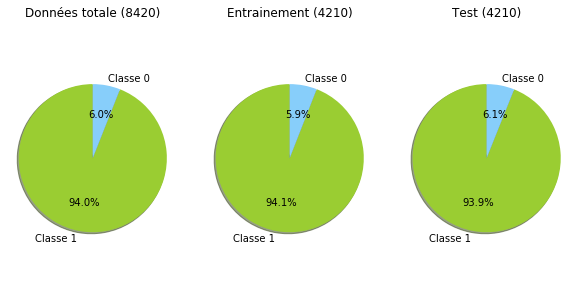

Model => Arbres de décisions
Time elapsed 0.04min
Model => Random Forest
Time elapsed 0.14min
Model => Knn
Time elapsed 0.19min
Model => Réseaux de neurones
Time elapsed 0.34min
FINI


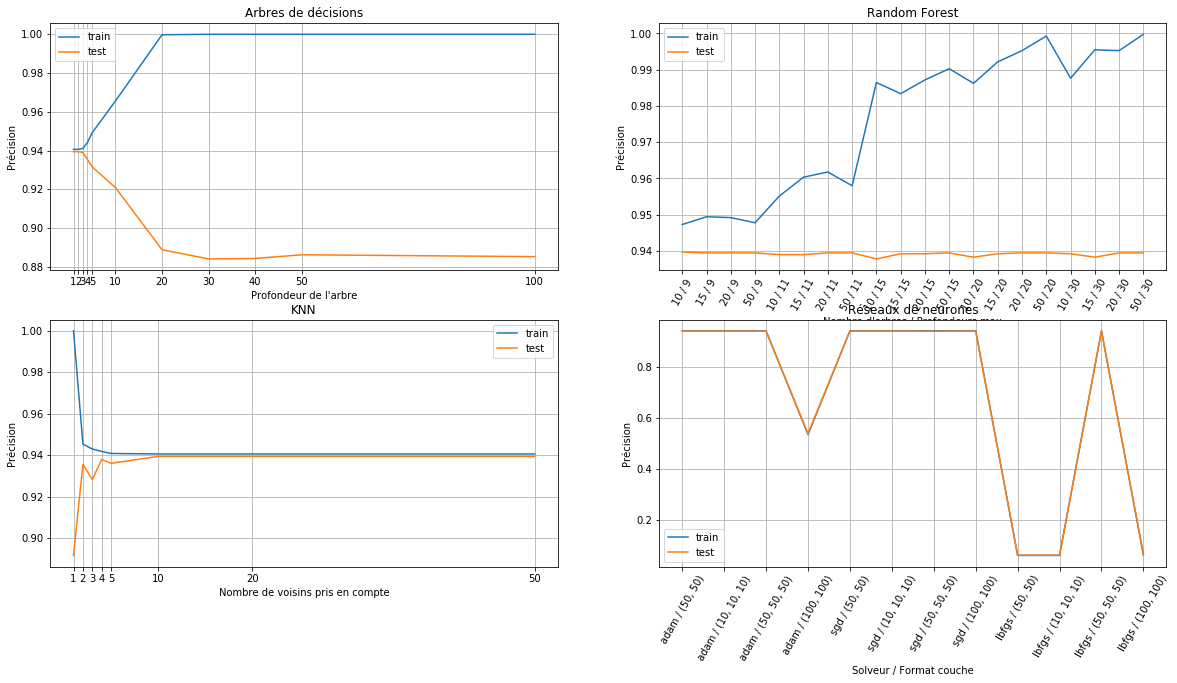

In [33]:
data_test = data_initial.dropna()
target_test = pd.DataFrame(data=data_test.TARGET)
del data_test["TARGET"]
evaluate_complete(data_test, target_test, 0.5, convert2string=True, knn=True, neuron=True)

On suppose que ces faibles résultats sont du à la répartition très inégale des données, nous allons donc faire un over-sampling sur la classe minoritaire

Conversion en int


C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


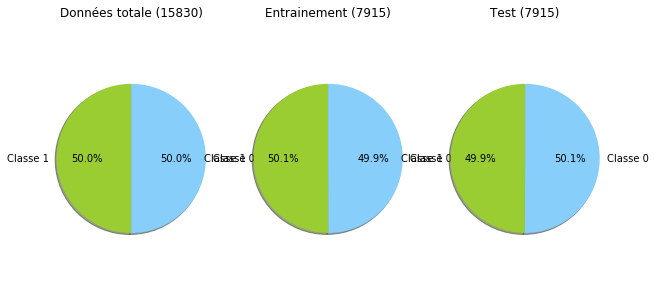

Model => Arbres de décisions
Time elapsed 0.04min
Model => Random Forest
Time elapsed 0.23min
Model => Knn
Time elapsed 0.34min
Model => Réseaux de neurones
Time elapsed 0.66min
FINI


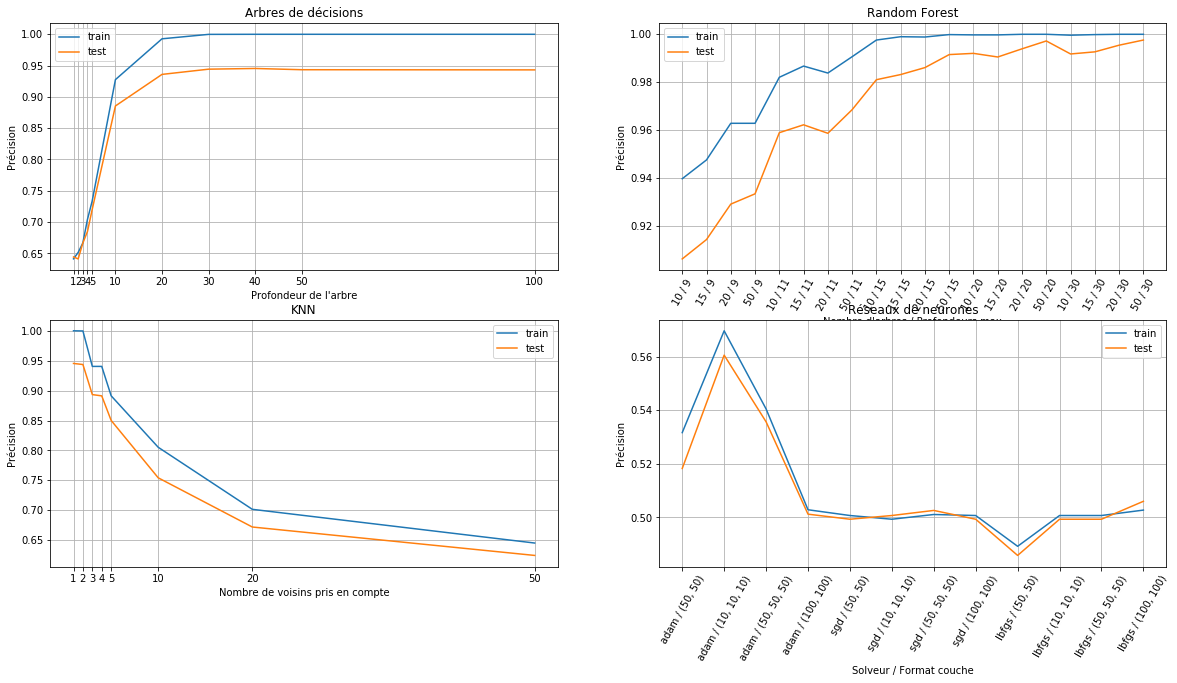

In [34]:
data_test = data_initial.dropna()
target_test = pd.DataFrame(data=data_test.TARGET)
del data_test["TARGET"]
evaluate_complete(data_test, target_test, 0.5, convert2string=True, knn=True, neuron=True, over_sampling=True)

On va maintenant supprimer les lignes pour lesquelles il y a plus de 10 NaN

C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


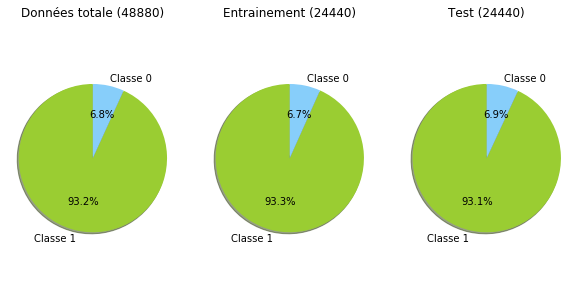

Model => Arbres de décisions
Time elapsed 0.16min
Model => Random Forest
Time elapsed 0.79min
Knn désactivés
Réseaux de neurones désactivés
FINI


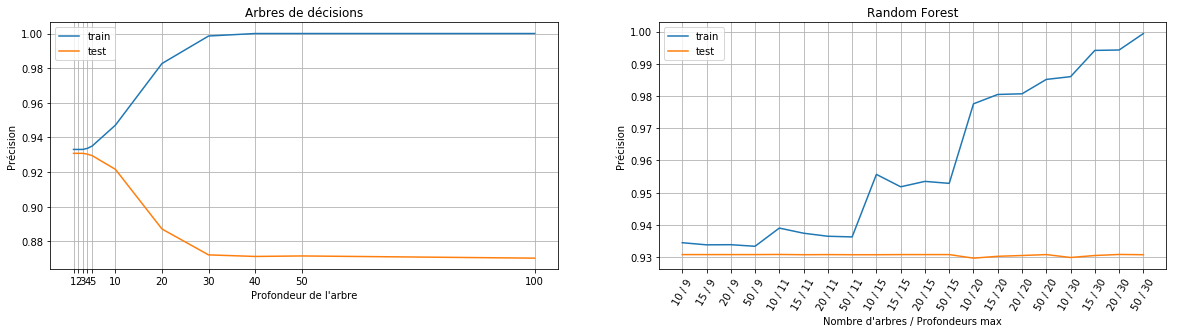

In [35]:
data_test = data_initial.dropna(axis = 0, thresh=55)
target_test = pd.DataFrame(data=data_test.TARGET)
del data_test["TARGET"]
data_test, list_word = stringify(data_test)
imputer = Imputer(missing_values='NaN', strategy='mean')
data_test = pd.DataFrame(imputer.fit_transform(data_test), columns=data_test.columns)
data_test, a, target_test, b = train_test_split(data_test, target_test, test_size = 0.5)
evaluate_complete(data_test, target_test, 0.5)

C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


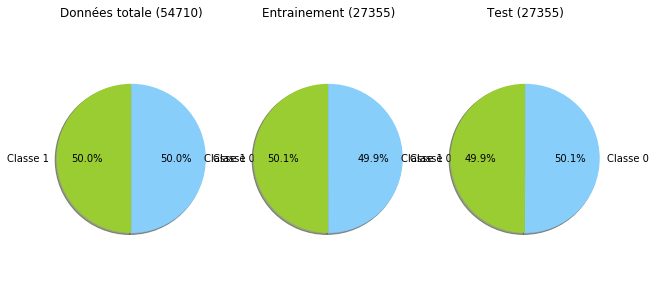

Model => Arbres de décisions
Time elapsed 0.13min
Model => Random Forest
Time elapsed 0.9min
Model => Knn
Time elapsed 1.78min
Model => Réseaux de neurones
Time elapsed 4.75min
FINI


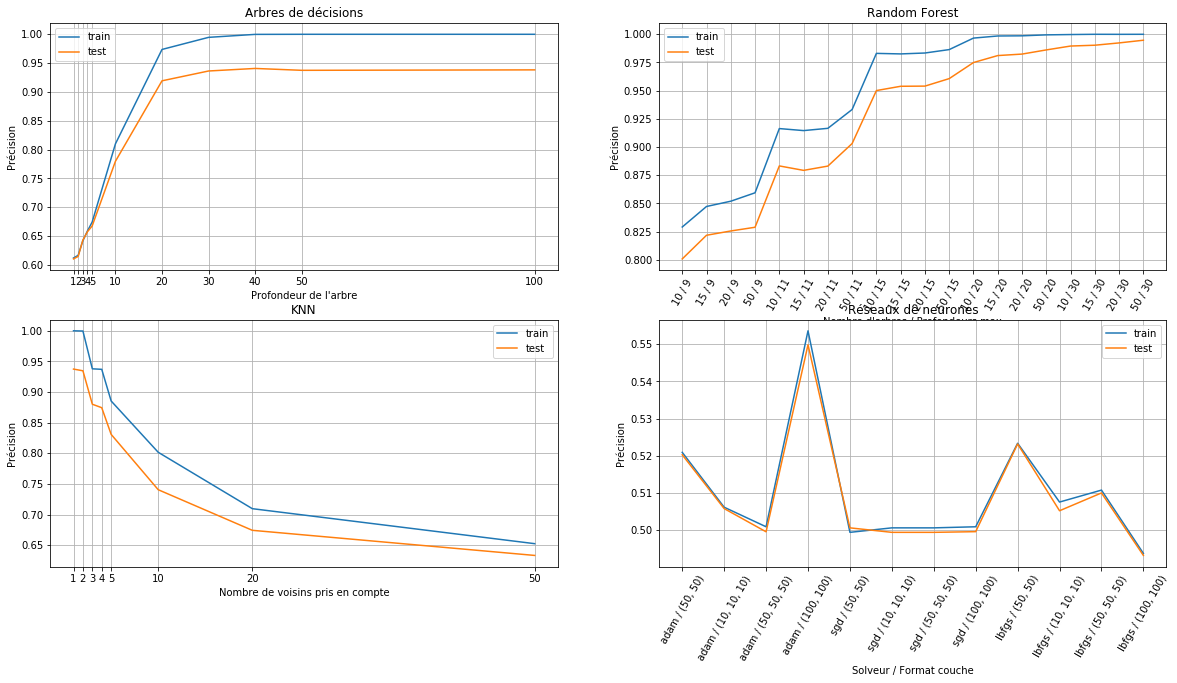

In [36]:
data_test = data_initial.dropna(axis = 0, thresh=55)
target_test = pd.DataFrame(data=data_test.TARGET)
del data_test["TARGET"]
data_test, list_word = stringify(data_test)
imputer = Imputer(missing_values='NaN', strategy='mean')
data_test = pd.DataFrame(imputer.fit_transform(data_test), columns=data_test.columns)
data_test, a, target_test, b = train_test_split(data_test, target_test, test_size = 0.7)
evaluate_complete(data_test, target_test, 0.5, over_sampling=True, neuron=True, knn=True)

C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


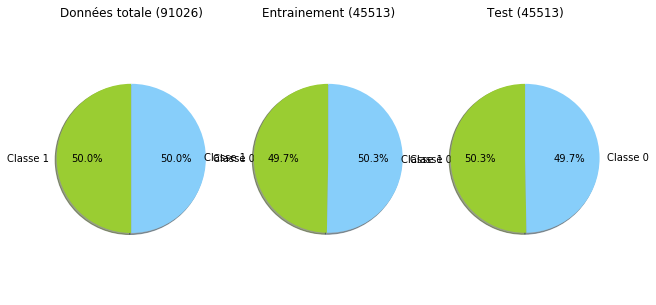

Model => Arbres de décisions
Time elapsed 0.22min
Model => Random Forest
Time elapsed 1.41min
Knn désactivés
Réseaux de neurones désactivés
FINI


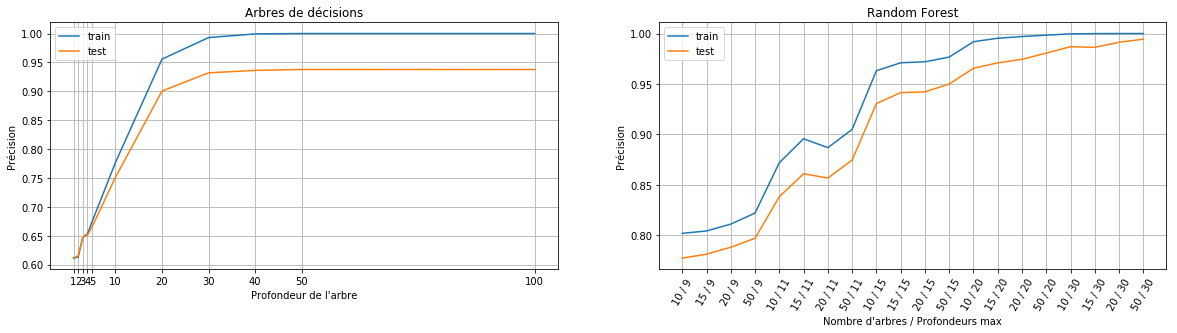

In [37]:
data_test = data_initial.dropna(axis = 0, thresh=55)
target_test = pd.DataFrame(data=data_test.TARGET)
del data_test["TARGET"]
data_test, list_word = stringify(data_test)
imputer = Imputer(missing_values='NaN', strategy='mean')
data_test = pd.DataFrame(imputer.fit_transform(data_test), columns=data_test.columns)
data_test, a, target_test, b = train_test_split(data_test, target_test, test_size = 0.5)
evaluate_complete(data_test, target_test, 0.5, over_sampling=True)

In [131]:
len(data_test)

97761

In [2]:
line_na = [sum(pd.isna(data.iloc[k])) for k in range(len(data))]
col_na = [sum(pd.isna(data[col])) for col in data.columns]

Text(0,0.5,'Nombre de colonnes')

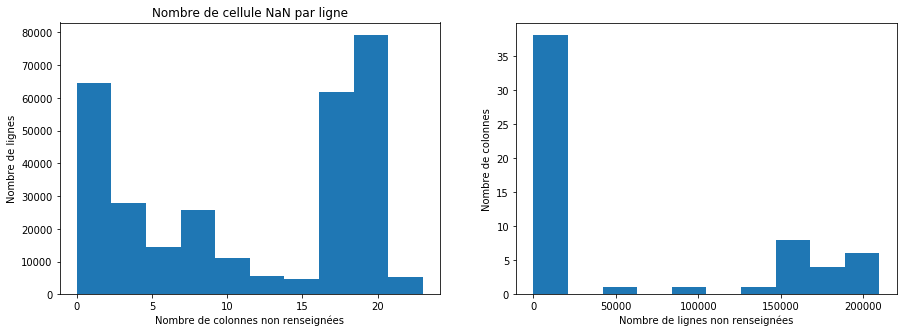

In [3]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(line_na)
plt.title("Nombre de cellule NaN par ligne")
plt.xlabel("Nombre de colonnes non renseignées")
plt.ylabel("Nombre de lignes")
plt.subplot(1, 2, 2)
plt.hist(col_na)
plt.xlabel("Nombre de lignes non renseignées")
plt.ylabel("Nombre de colonnes")

On peut voir que plus de la moitié des lignes ont plus de 16 colonnes avec un NaN

On va donc chercher à savoir quelles sont les colonnes dans lesquelles il y a le plus de données non-renseignées

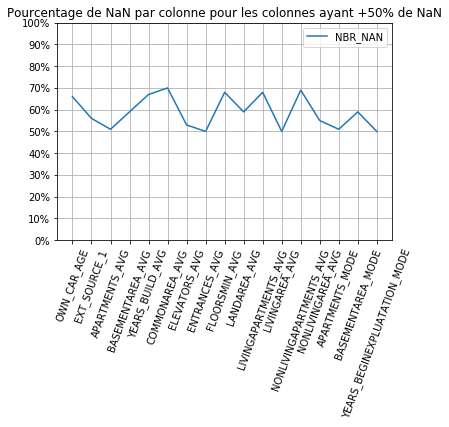

In [4]:
analysis = pd.DataFrame(data=col_na, index=data.columns, columns=["NBR_NAN"])
analysis_cond = analysis[analysis.NBR_NAN>=len(data)//2]
(round(analysis_cond/len(data)*100, 0)).plot()
plt.xticks(np.arange(len(analysis_cond)), analysis_cond.index, rotation=70)
li = np.arange(0, 101, step=10)
plt.yticks(li, ["{}%".format(element) for element in li])
plt.ylim([0, 100])
plt.title("Pourcentage de NaN par colonne pour les colonnes ayant +50% de NaN")
plt.grid()

On va maintenant chercher à savoir si parmis ces colonnes ayant un nombre important de données non-renseignées, ce ne serait pas toujours les même "paquets" de colonnes qui sont non-renseignées

In [7]:
line_na = pd.DataFrame(data=line_na, columns=["NBR_NAN"])

?data.apply
line_na.head()

,NBR_NAN
0,18
1,0
2,18
3,1
4,6


On va supprimer toutes les colonnes qui ont plus de 50% de NaN

In [109]:
data_drop = data.dropna(axis=1, thresh=len(data)/2)
print("On a supprimé {} colonnes".format(len(data.columns)-len(data_drop.columns)))

On a supprimé 17 colonnes


# Etude sur les données de classe 1

Text(0,0.5,'Nombre de lignes')

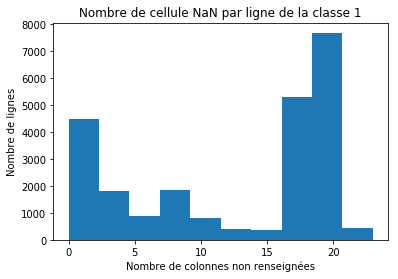

In [6]:
line_na_1 = [sum(pd.isna(data_1.iloc[k])) for k in range(len(data_1))]
plt.hist(line_na_1)
plt.title("Nombre de cellule NaN par ligne de la classe 1")
plt.xlabel("Nombre de colonnes non renseignées")
plt.ylabel("Nombre de lignes")

# I) Conversion des strings en int


J'ai converti tous les string en int, cela est indispensable à a normalisation des données pour ensuite gérer les NaN.
Car il faudrait mettre les NaN à 0 mais étant donné que l'on ne connais pas la dynamique de chaque colonne on ne peut pas savoir si 0 est une valeur pertinente

On partir d'ici, la table à traiter sera nommé `DATA`

In [110]:
DATA = data_drop

In [111]:
def stringify(dataFrame):
    """Permet de convertir les colonnes de string en int
    Renvoie le dictionnaire utilisé pour cette conversion et la bdd stringifiée"""
    
    def word2int(row):
        if row not in list_word[name_col]:
            list_word[name_col].append(row)
        return list_word[name_col].index(row)

    list_word = {}
    for name_col in dataFrame.columns:
        if isinstance(dataFrame[name_col].iloc[0], str):
            list_word[name_col] = []
            dataFrame[name_col] = dataFrame.loc[:, name_col].apply(word2int)
            
    return dataFrame, list_word

DATA, list_word = stringify(DATA)
list_word

C:\Users\aurel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{'NAME_CONTRACT_TYPE': ['Cash loans', 'Revolving loans'],
 'CODE_GENDER': ['F', 'M', 'XNA'],
 'FLAG_OWN_CAR': ['N', 'Y'],
 'FLAG_OWN_REALTY': ['Y', 'N'],
 'NAME_TYPE_SUITE': ['Family',
  'Unaccompanied',
  'Spouse, partner',
  'Children',
  'Other_B',
  'Other_A',
  nan,
  'Group of people'],
 'NAME_INCOME_TYPE': ['Commercial associate',
  'Working',
  'Pensioner',
  'State servant',
  'Maternity leave',
  'Unemployed',
  'Student',
  'Businessman'],
 'NAME_EDUCATION_TYPE': ['Secondary / secondary special',
  'Higher education',
  'Lower secondary',
  'Incomplete higher',
  'Academic degree'],
 'NAME_FAMILY_STATUS': ['Married',
  'Single / not married',
  'Civil marriage',
  'Separated',
  'Widow',
  'Unknown'],
 'NAME_HOUSING_TYPE': ['House / apartment',
  'Municipal apartment',
  'Rented apartment',
  'With parents',
  'Office apartment',
  'Co-op apartment'],
 'OCCUPATION_TYPE': ['Sales staff',
  'Managers',
  'Core staff',
  nan,
  'Cleaning staff',
  'Drivers',
  'High skill tech 

# II) Normalisation des données

In [6]:
imputer = Imputer(missing_values='NaN', strategy='mean')
DATA = pd.DataFrame(imputer.fit_transform(DATA), columns=DATA.columns)
DATA.describe()

C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,3.000000e+05,300000.000000,3.000000e+05,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000
mean,0.095087,0.341687,0.340270,0.306457,0.417227,1.688453e+05,5.993297e+05,27116.376684,5.386565e+05,0.982587,...,0.050803,0.040677,0.078230,0.230287,0.179353,9.559470,5.144469e-01,0.510894,0.977693,0.226334
std,0.293335,0.474304,0.473801,0.461022,0.722604,2.394820e+05,4.027135e+05,14489.234153,3.695075e+05,0.665862,...,0.219596,0.197540,0.268534,0.421017,0.383649,10.424148,1.908103e-01,0.174537,0.042652,0.102581
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16537.500000,2.385000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.931302e-01,0.417100,0.977693,0.166700
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.485000e+05,5.135310e+05,24916.500000,4.500000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.654645e-01,0.510894,0.977693,0.226334
75%,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,6.634767e-01,0.636376,0.982100,0.226334
max,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,57.000000,8.549997e-01,0.896010,1.000000,1.000000


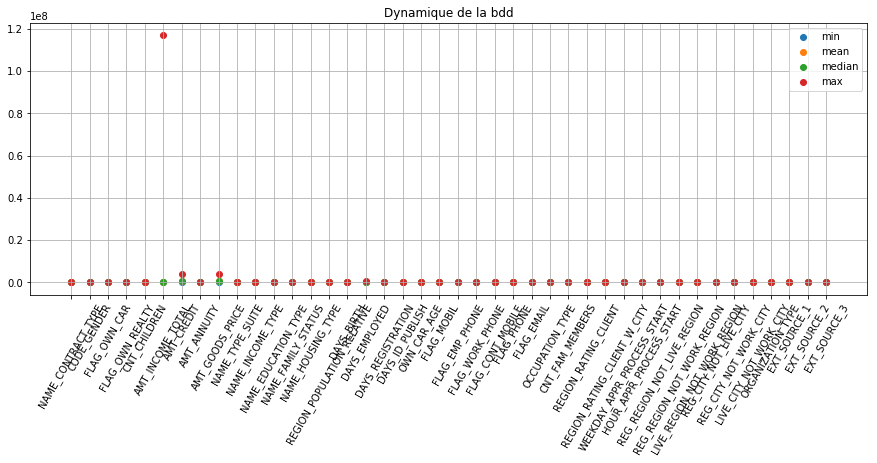

In [7]:
def display_dynamic(dataFrame):
    list_mi = []
    list_ma = []
    list_me = []
    list_med = []

    for feature, mi, ma, me, med in zip(np.array(dataFrame.columns), dataFrame.min(0), dataFrame.max(0), dataFrame.mean(0), np.median(dataFrame, axis=0)):
        list_mi.append(mi)
        list_ma.append(ma)
        list_me.append(me)
        list_med.append(med)

    plt.figure(figsize=(15, 5))
    length = dataFrame.shape[1]
    plt.title("Dynamique de la bdd")
    plt.scatter(range(length), list_mi, label="min")
    plt.scatter(range(length), list_me, label="mean")
    plt.scatter(range(length), list_med, label="median")
    plt.scatter(range(length), list_ma, label="max")
    plt.xticks(range(length), data.columns, rotation=60)
    plt.grid()
    plt.legend()
    plt.show()

display_dynamic(DATA)

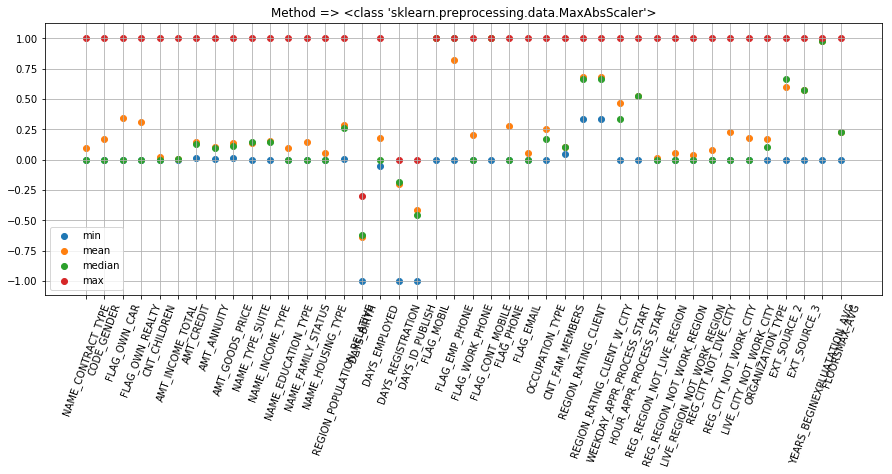

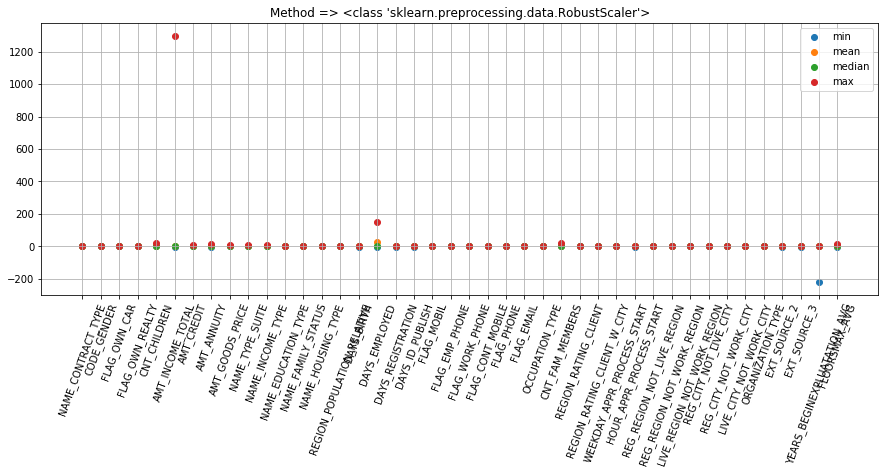

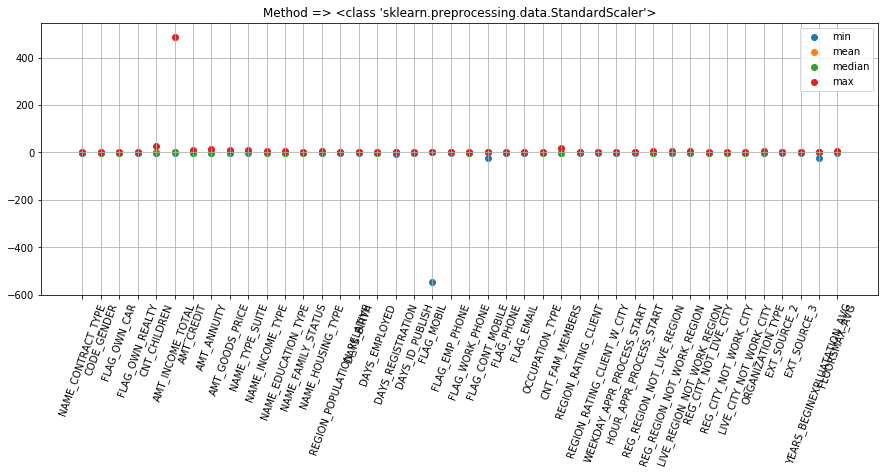

In [8]:
def show_scale_feature(scale_method, dataFrame):
    scaler = scale_method()
    scaler.fit(dataFrame)
    dataFrame_scaled = scaler.transform(dataFrame)

    list_mi = []
    list_ma = []
    list_me = []
    list_med = []

    for feature, mi, ma, me, med in zip(np.array(dataFrame.columns), dataFrame_scaled.min(0), dataFrame_scaled.max(0), dataFrame_scaled.mean(0), np.median(dataFrame_scaled, axis=0)):
        list_mi.append(mi)
        list_ma.append(ma)
        list_me.append(me)
        list_med.append(med)

    plt.figure(figsize=(15, 5))
    plt.title("Method => {}".format(scale_method))
    range_length = range(dataFrame.shape[1])
    plt.scatter(range_length, list_mi, label="min")
    plt.scatter(range_length, list_me, label="mean")
    plt.scatter(range_length, list_med, label="median")
    plt.scatter(range_length, list_ma, label="max")
    plt.xticks(range_length, dataFrame.columns, rotation=70)
    plt.grid()
    plt.legend()
    plt.show()
    
    return dataFrame_scaled

list_DATA = {}

for scale_method in [MaxAbsScaler, RobustScaler, StandardScaler]:
    list_DATA[scale_method] = show_scale_feature(scale_method, DATA)

On adapte le DataFrame des `target` pour qu'il soit cohérent avec celui des `DATA` au cas où on aurait supprimer les lignes

In [9]:
target['id'] = DATA.index
join = pd.DataFrame(data=DATA.index, columns=['id'])
target_join = pd.merge(target, join, on='id')
target_join.head()

,TARGET,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


# III) Réduction des dimensions par PCA

In [10]:
pca = PCA(n_components=15)
list_DATA_pca = {}

for scale_method in [MaxAbsScaler, RobustScaler, StandardScaler]:
    pca.fit(list_DATA[scale_method])
    list_DATA_pca[scale_method] = pca.transform(list_DATA[scale_method])

# IV) Equilibrage des données par super-sampling

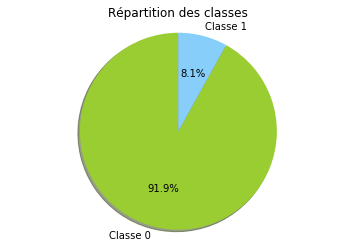

In [11]:
def repartition(target_data, labels):
    length = len(target_data)
    class_0 = round((length - sum(target_data))/length*100, 2)
    class_1 = round(sum(target_data)/length*100, 2)
    sizes = [class_0, class_1]
    
    colors = ['yellowgreen', 'lightskyblue']

    plt.pie(sizes, labels=labels, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')
    plt.title("Répartition des classes")

    plt.show()

repartition(target_join.TARGET, ['Classe 0', 'Classe 1'])

On va faire un super-sampling de la classe minoritaire

In [12]:
ros = RandomOverSampler()

DATA_pca_resampled = {}
target_join_resampled = {}

for scale_method in [MaxAbsScaler, RobustScaler, StandardScaler]:
    DATA_pca_resampled[scale_method], target_join_resampled[scale_method] = ros.fit_resample(list_DATA_pca[scale_method], target_join.TARGET)
    
    print(scale_method)
    print("On a rajouté {} lignes".format(len(DATA_pca_resampled[scale_method])-len(DATA)))
    print("Il y a maintenant {} lignes".format(len(DATA_pca_resampled[scale_method])))
    print()

<class 'sklearn.preprocessing.data.MaxAbsScaler'>
On a rajouté 251618 lignes
Il y a maintenant 551618 lignes

<class 'sklearn.preprocessing.data.RobustScaler'>
On a rajouté 251618 lignes
Il y a maintenant 551618 lignes

<class 'sklearn.preprocessing.data.StandardScaler'>
On a rajouté 251618 lignes
Il y a maintenant 551618 lignes



# V) Fractionnage des données

On ne prend plus que 5517 lignes, ce qui correspond à 1.0% du dataset


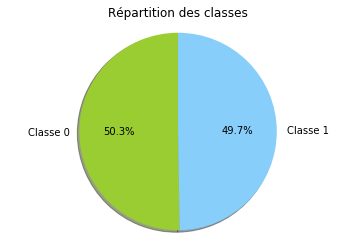

In [111]:
frac = 0.01

id_DataFrame = pd.DataFrame(data=pd.DataFrame(data=DATA_pca_resampled[MaxAbsScaler]).index, columns=["id"])
test_X, train_X, test_Y, train_Y = train_test_split(DATA_pca_resampled[MaxAbsScaler], target_join_resampled[MaxAbsScaler], test_size = frac)
print("On ne prend plus que {} lignes, ce qui correspond à {}% du dataset".format(len(train_X), frac*100))
repartition(train_Y, ['Classe 0', 'Classe 1'])

# VI) Etude des performances des différents modèles

## A) KNN

In [146]:
model = KNeighborsClassifier()
param = {"n_neighbors": [5, 10, 25, 50, 100]}
model_opti_knn = GridSearchCV(model, param, verbose=3, n_jobs=3)
model_opti_knn.fit(DATA_pca_resampled_split, target_join_resampled_split, cv=())

print("\n##########################\n")
print("Le meilleur score est de {}%".format(round(model_opti_knn.best_score_*100, 2)))
print("La meilleure combinaison de paramètres est {}".format(model_opti_knn.best_params_))

C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_neighbors=10 ..................................................
[CV] ......... n_neighbors=10, score=0.6218597063621534, total=   5.5s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s remaining:    0.0s


[CV] ......... n_neighbors=10, score=0.6148156205808768, total=   5.9s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.0s remaining:    0.0s


[CV] ......... n_neighbors=10, score=0.6201457630806048, total=   5.9s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.6296900489396411, total=   6.5s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.6309148264984227, total=   6.9s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.6324377243554878, total=   6.9s
[CV] n_neighbors=50 ..................................................
[CV] ......... n_neighbors=50, score=0.6411092985318108, total=   9.4s
[CV] n_neighbors=50 ..................................................
[CV] ......... n_neighbors=50, score=0.6336342869574676, total=   7.1s
[CV] n_neighbors=50 ..................................................
[CV] ......... n_neighbors=50, score=0.6380942021103013, total=   9.0s
[CV] n_neighbors=100 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.4min finished


## B) Support Vecteur Machine

Nous n'allons pas tester cette méthode car la complexité est quadratique suivant le nombre de données et dans la documentation il est conseillé de ne pas l'appliquer sur des données de plus de 10 000 lignes.

## C) Arbres de décision

In [147]:
model = DecisionTreeClassifier()
param = {"max_depth": [k for k in range(1, 51)]}
model_opti_arbre = GridSearchCV(model, param, verbose=3, n_jobs=3)
model_opti_arbre.fit(DATA_pca_resampled_split, target_join_resampled_split)

print("\n##########################\n")
print("Le meilleur score est de {}%".format(round(model_opti_arbre.best_score_*100, 2)))
print("La meilleure combinaison de paramètres est {}".format(model_opti_arbre.best_params_))

C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   10.4s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:   33.4s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:   40.6s finished



##########################

Le meilleur score est de 64.36%
La meilleure combinaison de paramètres est {'max_depth': 47}


## D) Fôrets aléatoire d'arbres de décision

In [148]:
model = RandomForestClassifier()
param = {"n_estimators": [k for k in range(1, 11)], "max_depth": [k for k in range(20, 51)]}
model_opti_forest = GridSearchCV(model, param, verbose=3, n_jobs=3)
model_opti_forest.fit(DATA_pca_resampled_split, target_join_resampled_split)

print("\n##########################\n")
print("Le meilleur score est de {}%".format(round(model_opti_forest.best_score_*100, 2)))
print("La meilleure combinaison de paramètres est {}".format(model_opti_forest.best_params_))

C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 310 candidates, totalling 930 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    8.5s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:   31.3s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done 930 out of 930 | elapsed:  3.8min finished



##########################

Le meilleur score est de 69.42%
La meilleure combinaison de paramètres est {'max_depth': 30, 'n_estimators': 10}


## E) Réseaux de neurones

In [149]:
model = MLPClassifier()
param = {"solver": ["adam", "sgd", "lbfgs"], "hidden_layer_sizes":[(50, 50), (10, 10, 10), (50, 50, 50), (100, 100)]}
model_opti_rdn = GridSearchCV(model, param, verbose=3, n_jobs=3)
model_opti_rdn.fit(DATA_pca_resampled_split, target_join_resampled_split)

print("\n##########################\n")
print("Le meilleur score est de {}%".format(round(model_opti_rdn.best_score_*100, 2)))
print("La meilleure combinaison de paramètres est {}".format(model_opti_rdn.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\aurel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  4.1min
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  7.9min finished



##########################

Le meilleur score est de 65.66%
La meilleure combinaison de paramètres est {'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}
